In [83]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [84]:
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv -o ./DataSet/redwine.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 18 84199   18 15872    0     0  20506      0  0:00:04 --:--:--  0:00:04 20480
100 84199  100 84199    0     0  89383      0 --:--:-- --:--:-- --:--:-- 89383


In [85]:
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv -o ./DataSet/whitewine.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 12  258k   12 31744    0     0  34060      0  0:00:07 --:--:--  0:00:07 34060
100  258k  100  258k    0     0   183k      0  0:00:01  0:00:01 --:--:--  183k


In [86]:
dfr = pd.read_csv('./DataSet/redwine.csv',sep=';')
dfw = pd.read_csv('./DataSet/whitewine.csv',sep=';')

In [87]:
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [88]:
cols = ['fix_acid','vol_acid','citric_acid','res_sug','chlor','free_sulf','tot_sulf','density','ph','sulphates','alcohol','quality']

dfr.columns=cols
dfw.columns=cols

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fix_acid       6497 non-null float64
vol_acid       6497 non-null float64
citric_acid    6497 non-null float64
res_sug        6497 non-null float64
chlor          6497 non-null float64
free_sulf      6497 non-null float64
tot_sulf       6497 non-null float64
density        6497 non-null float64
ph             6497 non-null float64
sulphates      6497 non-null float64
alcohol        6497 non-null float64
quality        6497 non-null int64
color          6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [89]:
dfr['color']='Red'
dfw['color']='White'

In [90]:
df = pd.concat([dfr,dfw],axis=0)
df['color'].unique()

array(['Red', 'White'], dtype=object)

In [91]:
df['quality'].unique()
df.describe()

,fix_acid,vol_acid,citric_acid,res_sug,chlor,free_sulf,tot_sulf,density,ph,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


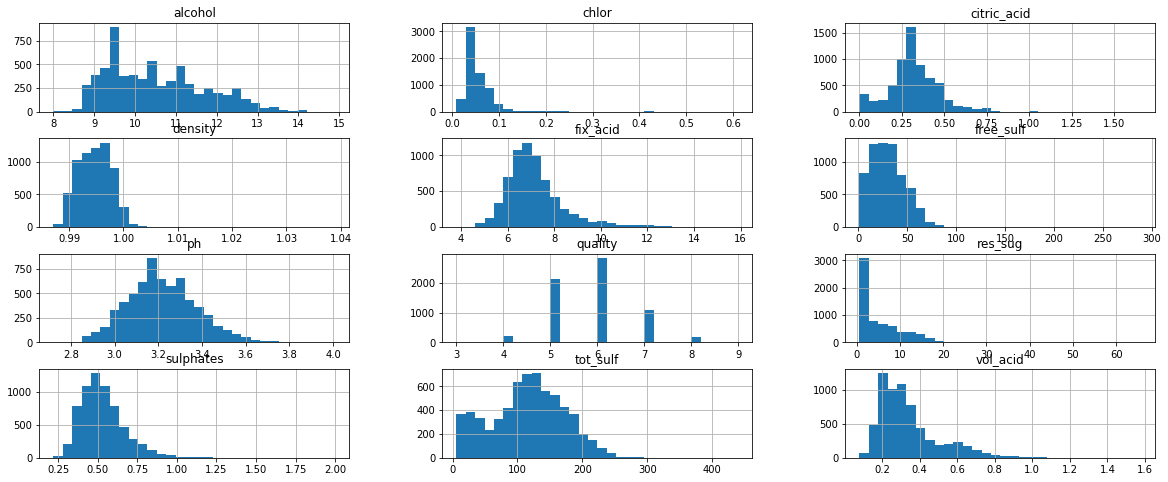

In [108]:
df.hist(bins=30,figsize=(20,8));

In [93]:
df.corr()

,fix_acid,vol_acid,citric_acid,res_sug,chlor,free_sulf,tot_sulf,density,ph,sulphates,alcohol,quality
fix_acid,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
vol_acid,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
res_sug,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlor,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulf,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
tot_sulf,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
ph,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


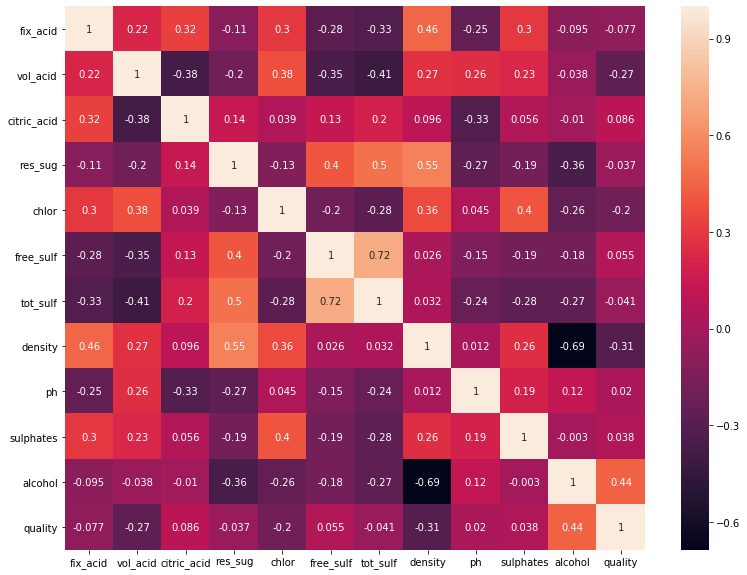

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

In [123]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality        1.000000
alcohol        0.444319
citric_acid    0.085532
free_sulf      0.055463
sulphates      0.038485
ph             0.019506
res_sug       -0.036980
tot_sulf      -0.041385
fix_acid      -0.076743
chlor         -0.200666
vol_acid      -0.265699
density       -0.305858
Name: quality, dtype: float64

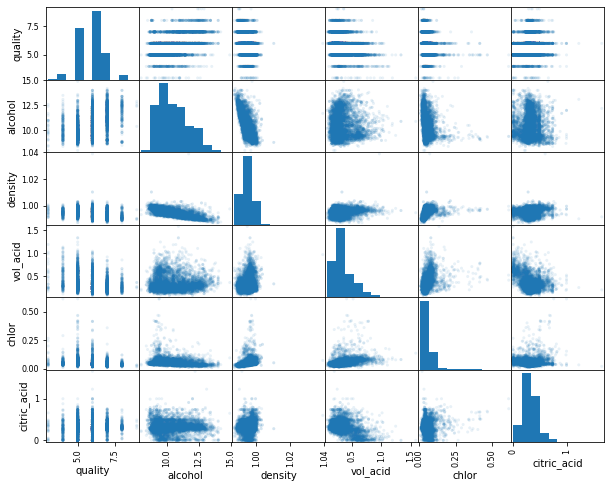

In [183]:
from pandas.plotting import scatter_matrix

attributes = ["quality","alcohol", "density", "vol_acid","chlor","citric_acid"]
scatter_matrix(df[attributes],figsize=(10,8),alpha=0.1);

In [154]:
from sklearn.model_selection import train_test_split

X=df.drop(labels='color', axis=1)
Y=df['color']

# Create train and test sets
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=37)

In [155]:
from sklearn.preprocessing import StandardScaler

# Scale x data
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain_s = scaler.transform(xtrain)
xtest_s = scaler.transform(xtest)

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

classifs = [KNeighborsClassifier(n_neighbors=5),
           DecisionTreeClassifier(),
           SVC(),
           RandomForestClassifier(n_estimators=10,random_state=37),
           AdaBoostClassifier(),
           GaussianNB(),
           MLPClassifier(random_state=37),
           ]

classif_names=['KNN\t\t', 
               'DecisionTree\t', 
               'SVC\t\t',
               'RandomForest\t',
               'AdaBoost\t',
               'Naive Bayes\t',
               'MLP\t\t']

# Apply different classifiers
bestscore=0
bestclf =''
for name, clf in zip(classif_names, classifs):
    classifier = clf.fit(xtrain_s, ytrain)
    
    score1 = classifier.score(xtest_s, ytest)*100
    print("%s Score : %.2f %%" % (name, score1))
    if score1 > bestscore:
        bestscore = score1
        ypred = classifier.predict(xtest_s)
        bestclf = name

KNN		 Score : 99.46 %
DecisionTree	 Score : 99.31 %
SVC		 Score : 99.85 %
RandomForest	 Score : 99.77 %
AdaBoost	 Score : 99.62 %
Naive Bayes	 Score : 97.92 %
MLP		 Score : 99.85 %


C:\MY_SOFTS\DEV\IDE\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [157]:
from sklearn.metrics import classification_report, confusion_matrix

print('Best score using: %s' % bestclf)
confmatr = confusion_matrix(ytest, ypred)
confm = pd.DataFrame(confmatr)

print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

Best score using: SVC		
[[319   1]
 [  1 979]]
              precision    recall  f1-score   support

         Red       1.00      1.00      1.00       320
       White       1.00      1.00      1.00       980

    accuracy                           1.00      1300
   macro avg       1.00      1.00      1.00      1300
weighted avg       1.00      1.00      1.00      1300



Make a model for quality CLASSIFICATION

In [158]:
from sklearn.model_selection import train_test_split

X=df.drop(labels=['color','quality'], axis=1)
Y=df['quality']

# Create train and test sets
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=37)

In [146]:
from sklearn.preprocessing import StandardScaler

# Scale x data
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain_s = scaler.transform(xtrain)
xtest_s = scaler.transform(xtest)

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

classifs = [KNeighborsClassifier(n_neighbors=6),
           DecisionTreeClassifier(),
           SVC(),
           RandomForestClassifier(n_estimators=20,random_state=37),
           AdaBoostClassifier(),
           GaussianNB(),
           MLPClassifier(random_state=37),
           ]

classif_names=['KNN\t\t', 
               'DecisionTree\t', 
               'SVC\t\t',
               'RandomForest\t',
               'AdaBoost\t',
               'Naive Bayes\t',
               'MLP Classifier\t',
               ]

# Apply different classifiers
bestscore=0
bestclf =''
for name, clf in zip(classif_names, classifs):
    classifier = clf.fit(xtrain_s, ytrain)
    
    score1 = classifier.score(xtest_s, ytest)*100
    print("%s Score : %.2f %%" % (name, score1))
    if score1 > bestscore:
        bestscore = score1
        ypred = classifier.predict(xtest_s)
        bestclf = name

KNN		 Score : 53.46 %
DecisionTree	 Score : 60.08 %
SVC		 Score : 58.15 %
RandomForest	 Score : 68.38 %
AdaBoost	 Score : 35.54 %
Naive Bayes	 Score : 44.46 %
MLP Classifier	 Score : 59.00 %


C:\MY_SOFTS\DEV\IDE\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [187]:
from sklearn.metrics import classification_report, confusion_matrix

print('Best score using: %s' % bestclf)
confmatr = confusion_matrix(ytest, ypred)
confm = pd.DataFrame(confmatr)

print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

Best score using: RandomForest	
[[  0   1   3   2   0   0   0]
 [  0   7  25  11   0   0   0]
 [  0   0 316 110   2   0   0]
 [  0   2  94 433  38   0   0]
 [  0   0   8  86 122   0   0]
 [  0   0   0  17  11  11   0]
 [  0   0   0   1   0   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.70      0.16      0.26        43
           5       0.71      0.74      0.72       428
           6       0.66      0.76      0.71       567
           7       0.71      0.56      0.63       216
           8       1.00      0.28      0.44        39
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1300
   macro avg       0.54      0.36      0.39      1300
weighted avg       0.69      0.68      0.67      1300



C:\MY_SOFTS\DEV\IDE\Anaconda3\envs\test\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Make a model for quality REGRESSION

In [188]:
from sklearn.model_selection import train_test_split

X=df.drop(labels=['color','quality'], axis=1)
Y=df['quality']

# Create train and test sets
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=37)

In [189]:
from sklearn.preprocessing import StandardScaler

# Scale x data
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain_s = scaler.transform(xtrain)
xtest_s = scaler.transform(xtest)

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

regressor = [
            LinearRegression(),
            KNeighborsRegressor(n_neighbors=10),
            DecisionTreeRegressor(max_depth=4),
            SVR(),
            RandomForestRegressor(n_estimators=50,random_state=37),
            AdaBoostRegressor(),
            MLPRegressor(random_state=37),
           ]

reg_names=[
            'Linear', 
            'KNN',
            'Decision Tree',
            'SVR',
            'RandomForest',
            'AdaBoost',
            'MLP',
               ]

# Apply different classifiers
bestscore=0
bestclf =''
for name, clf in zip(reg_names, regressor):
    reg = clf.fit(xtrain_s, ytrain)
    
    score1 = reg.score(xtest_s, ytest)*100
    print("%s Score : %.2f %%" % (name, score1))
    if score1 > bestscore:
        bestscore = score1
        ypred = reg.predict(xtest_s)
        bestclf = name

Linear Score : 29.78 %
KNN Score : 36.82 %
Decision Tree Score : 26.48 %
SVR Score : 40.59 %
RandomForest Score : 49.34 %
AdaBoost Score : 30.69 %
MLP Score : 38.37 %


C:\MY_SOFTS\DEV\IDE\Anaconda3\envs\test\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('Best score using: %s' % bestclf)
confmatr = confusion_matrix(ytest, ypred)
confm = pd.DataFrame(confmatr)

print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

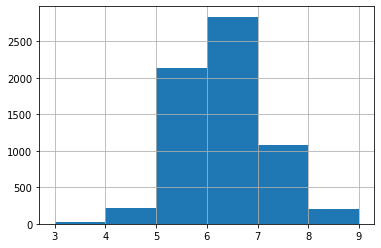

In [197]:
df['quality'].hist(bins=6);